In [31]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### DATA LOADING

In [12]:
df_dev = pd.read_csv('development.csv', index_col= 0)
#df_dev

In [18]:
df_eval = pd.read_csv('evaluation.csv', index_col= 0)
#df_eval

In [24]:
print(f"Development set shape: {df_dev.shape}")
print(f"Evaluation set shape: {df_eval.shape}")

Development set shape: (79589, 20)
Evaluation set shape: (19898, 19)


### DATA EXPLORATION

In [25]:
# Basic information
print("\n1. DATASET OVERVIEW")
print("-" * 30)
print(f"Development set shape: {df_dev.shape}")
print(f"Evaluation set shape: {df_eval.shape}")


1. DATASET OVERVIEW
------------------------------
Development set shape: (79589, 20)
Evaluation set shape: (19898, 19)


In [49]:
print("\n2.A DATA TYPES AND MISSING VALUES (DEVELOPMENT)")
print("-" * 40)

missing_info = pd.DataFrame({
    'Data Type': df_dev.dtypes,
    'Missing Count': df_dev.isnull().sum(),
    'Missing %': (df_dev.isnull().sum() / len(df_dev)) * 100
    })
print(missing_info)


2.A DATA TYPES AND MISSING VALUES (DEVELOPMENT)
----------------------------------------
             Data Type  Missing Count  Missing %
title           object              0   0.000000
body            object              0   0.000000
amenities       object          12804  16.087650
bathrooms      float64             51   0.064079
bedrooms       float64             89   0.111824
currency        object              0   0.000000
fee             object              0   0.000000
has_photo       object              0   0.000000
pets_allowed    object          48320  60.711907
price          float64              0   0.000000
price_type      object              0   0.000000
square_feet      int64              0   0.000000
address         object          73226  92.005177
cityname        object            234   0.294010
state           object            234   0.294010
latitude       float64             23   0.028898
longitude      float64             23   0.028898
source          object      

In [50]:
print("\n2.B DATA TYPES AND MISSING VALUES (EVALUATION)")
print("-" * 40)
missing_info = pd.DataFrame({
    'Data Type': df_eval.dtypes,
    'Missing Count': df_eval.isnull().sum(),
    'Missing %': (df_eval.isnull().sum() / len(df_dev)) * 100
    })
print(missing_info)


2.B DATA TYPES AND MISSING VALUES (EVALUATION)
----------------------------------------
             Data Type  Missing Count  Missing %
title           object              0   0.000000
body            object              0   0.000000
amenities       object           3240   4.070914
bathrooms      float64             11   0.013821
bedrooms       float64             34   0.042719
currency        object              0   0.000000
fee             object              0   0.000000
has_photo       object              0   0.000000
pets_allowed    object          12102  15.205619
price_type      object              0   0.000000
square_feet      int64              0   0.000000
address         object          18320  23.018256
cityname        object             68   0.085439
state           object             68   0.085439
latitude       float64              2   0.002513
longitude      float64              2   0.002513
source          object              0   0.000000
time             int64       

The address, which we intuitively know is a valid component when determining rent price, is missing from %92 of the listings. This is problematic, and will have to be handled.

In [29]:
print(df_dev['address'])

category
housing/rent/apartment                        NaN
housing/rent/apartment                        NaN
housing/rent/apartment                        NaN
housing/rent/apartment                        NaN
housing/rent/apartment                        NaN
                                   ...           
housing/rent/apartment    691 Fruit Cove Forest E
housing/rent/apartment                        NaN
housing/rent/apartment                        NaN
housing/rent/apartment              1830 S Milton
housing/rent/apartment                        NaN
Name: address, Length: 79589, dtype: object


In [30]:
 # Target variable analysis
print("\n3. TARGET VARIABLE ANALYSIS")
print("-" * 35)
target_stats = df_dev['price'].describe()
print(target_stats)


3. TARGET VARIABLE ANALYSIS
-----------------------------------
count    79589.000000
mean      1525.025983
std        892.078246
min        100.000000
25%       1010.000000
50%       1350.000000
75%       1795.000000
max      52500.000000
Name: price, dtype: float64


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

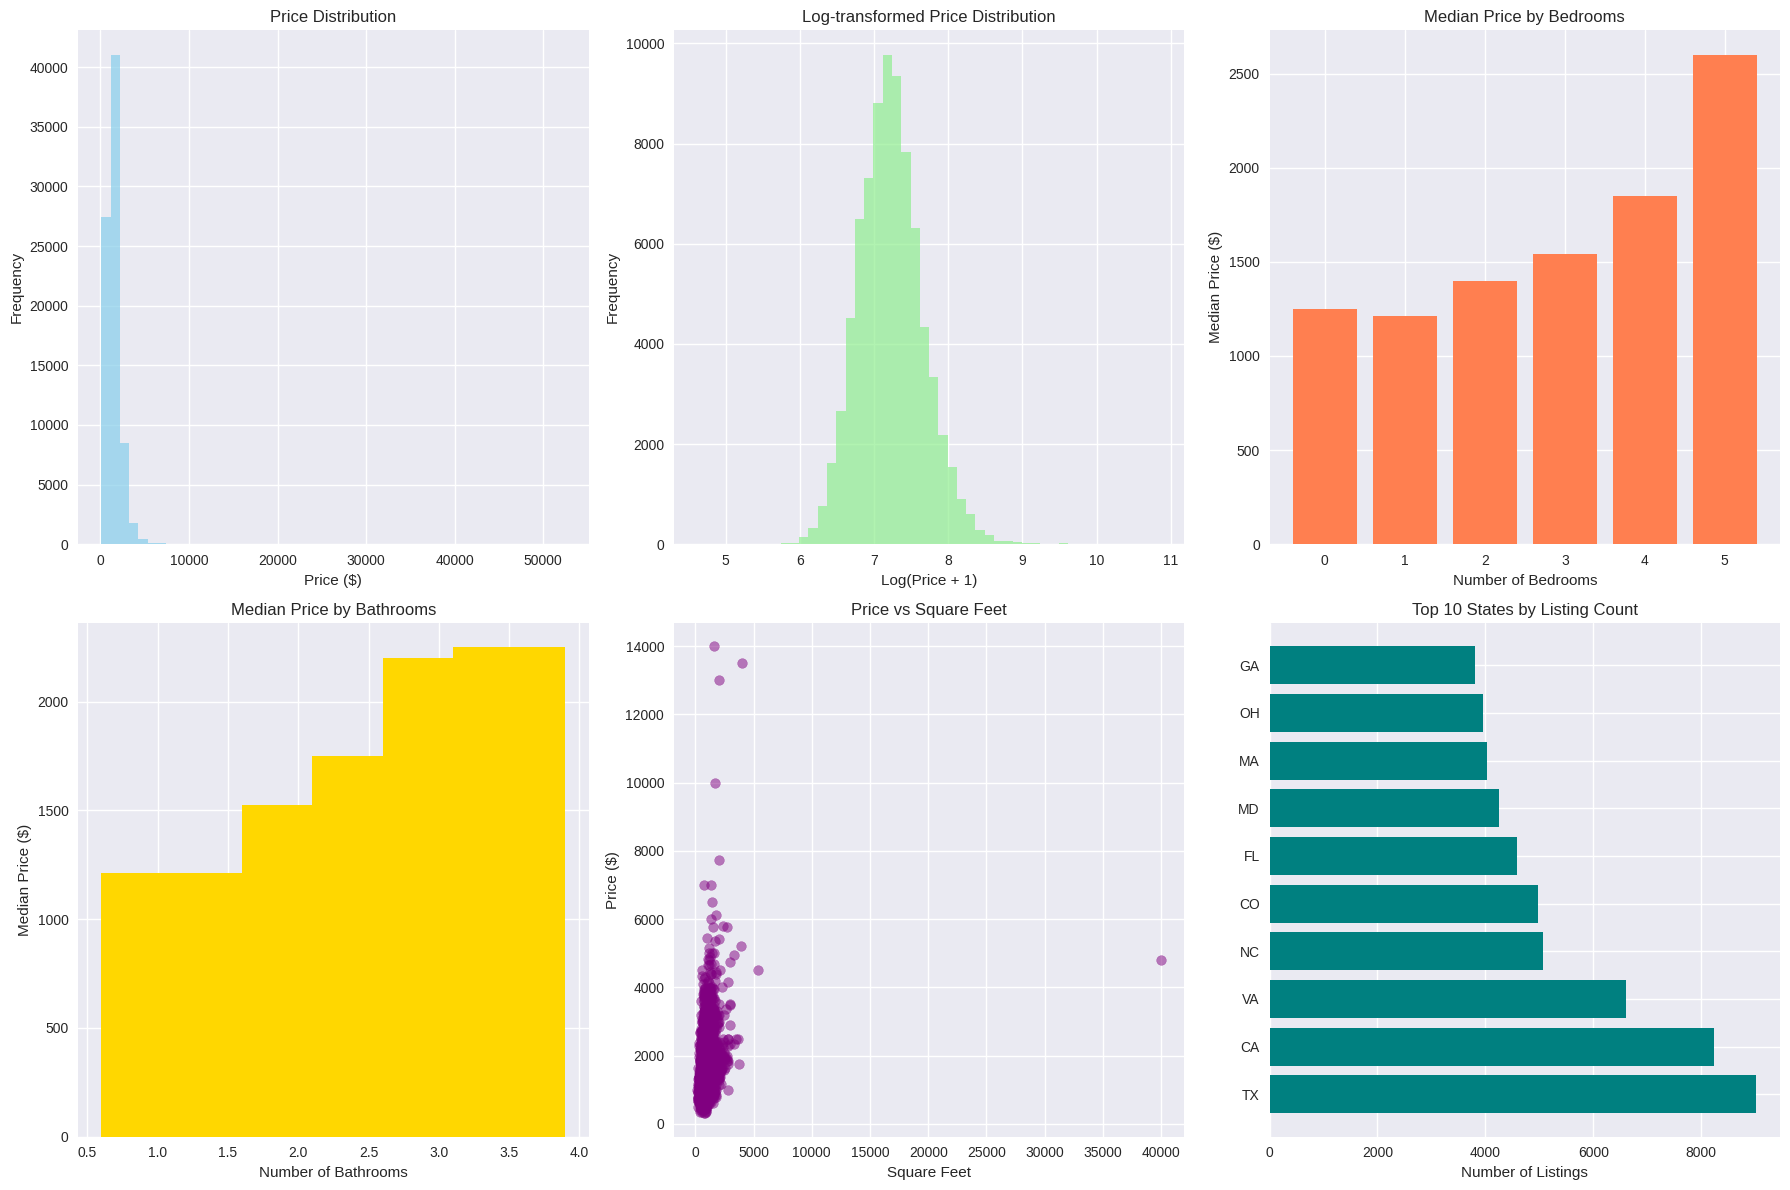

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Price distribution
axes[0, 0].hist(df_dev['price'], bins=50, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Price Distribution')
axes[0, 0].set_xlabel('Price ($)')
axes[0, 0].set_ylabel('Frequency')

# Log-transformed price distribution
log_prices = np.log1p(df_dev['price'])
axes[0, 1].hist(log_prices, bins=50, alpha=0.7, color='lightgreen')
axes[0, 1].set_title('Log-transformed Price Distribution')
axes[0, 1].set_xlabel('Log(Price + 1)')
axes[0, 1].set_ylabel('Frequency')

# Price by bedrooms
bedroom_price = df_dev.groupby('bedrooms')['price'].median().head(6)
axes[0, 2].bar(bedroom_price.index, bedroom_price.values, color='coral')
axes[0, 2].set_title('Median Price by Bedrooms')
axes[0, 2].set_xlabel('Number of Bedrooms')
axes[0, 2].set_ylabel('Median Price ($)')

# Price by bathrooms
bathroom_price = df_dev.groupby('bathrooms')['price'].median().head(6)
axes[1, 0].bar(bathroom_price.index, bathroom_price.values, color='gold')
axes[1, 0].set_title('Median Price by Bathrooms')
axes[1, 0].set_xlabel('Number of Bathrooms')
axes[1, 0].set_ylabel('Median Price ($)')

# Price by square feet (scatter plot with sample)
sample_data = df_dev.sample(5000) if len(df_dev) > 5000 else df_dev
axes[1, 1].scatter(sample_data['square_feet'], sample_data['price'], alpha=0.5, color='purple')
axes[1, 1].set_title('Price vs Square Feet')
axes[1, 1].set_xlabel('Square Feet')
axes[1, 1].set_ylabel('Price ($)')

# Top 10 states by listing count
top_states = df_dev['state'].value_counts().head(10)
axes[1, 2].barh(range(len(top_states)), top_states.values, color='teal')
axes[1, 2].set_yticks(range(len(top_states)))
axes[1, 2].set_yticklabels(top_states.index)
axes[1, 2].set_title('Top 10 States by Listing Count')
axes[1, 2].set_xlabel('Number of Listings')

plt.tight_layout()
plt.show()

### DATA PREPROCESSING

In [69]:
# Combine datasets for consistent preprocessing
dev_data = df_dev.copy()
eval_data = df_eval.copy()

# Add identifier for later separation
dev_data['dataset'] = 'development'
eval_data['dataset'] = 'evaluation'
eval_data['price'] = np.nan  # Add price column for consistency

combined_data = pd.concat([dev_data, eval_data], ignore_index=True)

In [71]:
print("\n1. HANDLING MISSING VALUES")
# We have to fill missing values with appropriate strategies

# Numerical features
combined_data['bathrooms'].fillna(combined_data['bathrooms'].median(), inplace=True)
combined_data['bedrooms'].fillna(combined_data['bedrooms'].median(), inplace=True)
combined_data.dropna(subset=['latitude', 'longitude'], inplace=True)

# Categorical features
combined_data.drop('pets_allowed', axis=1, inplace=True)
combined_data.dropna(subset=['cityname', 'state'], inplace=True)

# Text features
combined_data['amenities'].fillna('', inplace=True)
combined_data.drop('address', axis=1, inplace=True)




1. HANDLING MISSING VALUES


In [75]:
print("DATA TYPES AND MISSING VALUES (COMBINED)")
print("-" * 40)
missing_info = pd.DataFrame({
    'Data Type': combined_data.dtypes,
    'Missing Count': combined_data.isnull().sum(),
    'Missing %': (combined_data.isnull().sum() / len(combined_data)) * 100
    })
print(missing_info)

DATA TYPES AND MISSING VALUES (COMBINED)
----------------------------------------
            Data Type  Missing Count  Missing %
title          object              0   0.000000
body           object              0   0.000000
amenities      object              0   0.000000
bathrooms     float64              0   0.000000
bedrooms      float64              0   0.000000
currency       object              0   0.000000
fee            object              0   0.000000
has_photo      object              0   0.000000
price         float64          19830  19.992942
price_type     object              0   0.000000
square_feet     int64              0   0.000000
cityname       object              0   0.000000
state          object              0   0.000000
latitude      float64              0   0.000000
longitude     float64              0   0.000000
source         object              0   0.000000
time            int64              0   0.000000
id              int64              0   0.000000
datase

In [76]:
print("\n2. FEATURE ENGINEERING")
print("-" * 25)

# Create new features
# Price per square foot (only for development data)
dev_mask = combined_data['dataset'] == 'development'
combined_data.loc[dev_mask, 'price_per_sqft'] = (
      combined_data.loc[dev_mask, 'price'] / combined_data.loc[dev_mask, 'square_feet'])

# Total rooms
combined_data['total_rooms'] = combined_data['bedrooms'] + combined_data['bathrooms']

# Bathroom to bedroom ratio
combined_data['bath_bed_ratio'] = combined_data['bathrooms'] / (combined_data['bedrooms'] + 1)

# Text length features
combined_data['title_length'] = combined_data['title'].str.len()
combined_data['body_length'] = combined_data['body'].str.len()
combined_data['amenities_count'] = combined_data['amenities'].str.count(',') + 1


# Extract time features
combined_data['time'] = pd.to_datetime(combined_data['time'])
combined_data['listing_year'] = combined_data['time'].dt.year
combined_data['listing_month'] = combined_data['time'].dt.month
combined_data['listing_day'] = combined_data['time'].dt.day
combined_data['listing_weekday'] = combined_data['time'].dt.weekday


2. FEATURE ENGINEERING
-------------------------


In [77]:
print("\n3. CATEGORICAL ENCODING")
print("-" * 25)

# Handle high cardinality categorical features
# Keep only top N categories, replace others with 'Other'
for col in ['cityname', 'state', 'source']:
      top_categories = combined_data[col].value_counts().head(20).index
      combined_data[col] = combined_data[col].apply(lambda x: x if x in top_categories else 'Other')

# Separate datasets back
dev_processed = combined_data[combined_data['dataset'] == 'development'].copy()
eval_processed = combined_data[combined_data['dataset'] == 'evaluation'].copy()

# Remove helper columns
dev_processed.drop(['dataset'], axis=1, inplace=True)
eval_processed.drop(['dataset'], axis=1, inplace=True)

# Store processed data
development_data = dev_processed
evaluation_data = eval_processed

print(f"Processed development set shape: {development_data.shape}")
print(f"Processed evaluation set shape: {evaluation_data.shape}")


3. CATEGORICAL ENCODING
-------------------------
Processed development set shape: (79355, 28)
Processed evaluation set shape: (19830, 28)


In [79]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print("\n" + "=" * 50)
print("FEATURE PREPARATION")
print("=" * 50)

# Define feature groups
numerical_features = [
      'bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude',
      'total_rooms', 'bath_bed_ratio', 'title_length', 'body_length',
      'amenities_count', 'dist_from_nyc', 'listing_year', 'listing_month',
      'listing_day', 'listing_weekday'
      ]

categorical_features = [
      'category', 'currency', 'has_photo', 'pets_allowed',
      'cityname', 'state', 'source'
      ]

# Remove any features that don't exist
numerical_features = [f for f in numerical_features if f in development_data.columns]
categorical_features = [f for f in categorical_features if f in development_data.columns]

print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features}")

# Create preprocessing pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Fit and transform development data
X_dev = development_data[numerical_features + categorical_features]
y_dev = development_data['price']

X_dev_processed = preprocessor.fit_transform(X_dev)

# Transform evaluation data
X_eval = evaluation_data[numerical_features + categorical_features]
X_eval_processed = preprocessor.transform(X_eval)


# Get feature names for interpretability
feature_names = (numerical_features +
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))

print(f"Final feature matrix shape: {X_dev_processed.shape}")
print(f"Target variable shape: {y_dev.shape}")



FEATURE PREPARATION
Numerical features (14): ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude', 'total_rooms', 'bath_bed_ratio', 'title_length', 'body_length', 'amenities_count', 'listing_year', 'listing_month', 'listing_day', 'listing_weekday']
Categorical features (5): ['currency', 'has_photo', 'cityname', 'state', 'source']
Final feature matrix shape: (79355, 81)
Target variable shape: (79355,)


In [80]:
"""Train multiple regression models and compare their performance."""
print("\n" + "=" * 50)
print("MODEL TRAINING AND EVALUATION")
print("=" * 50)

# Split data for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_dev_processed, y_dev, test_size=0.2, random_state=42
)

# Define models to train
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Elastic Net': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', C=1.0)
}

# Train and evaluate each model
results = {}

print("\nTraining models...")
for name, model in models.items():
      print(f"\nTraining {name}...")

      # Train model
      model.fit(X_train, y_train)

      # Make predictions
      y_pred_train = model.predict(X_train)
      y_pred_val = model.predict(X_val)

      # Calculate metrics
      train_mae = mean_absolute_error(y_train, y_pred_train)
      val_mae = mean_absolute_error(y_val, y_pred_val)
      train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
      val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
      val_r2 = r2_score(y_val, y_pred_val)

      results[name] = {
          'model': model,
          'train_mae': train_mae,
          'val_mae': val_mae,
          'train_rmse': train_rmse,
          'val_rmse': val_rmse,
          'val_r2': val_r2
      }

      print(f"  Train MAE: {train_mae:.2f}")
      print(f"  Val MAE: {val_mae:.2f}")
      print(f"  Val R²: {val_r2:.4f}")

      # Store results
      models = results

      # Find best model based on validation MAE
      best_model_name = min(results.keys(), key=lambda x: results[x]['val_mae'])
      best_model = results[best_model_name]['model']
      best_model_name = best_model_name

print(f"\nBest model: {best_model_name} (Val MAE: {results[best_model_name]['val_mae']:.2f})")





MODEL TRAINING AND EVALUATION

Training models...

Training Linear Regression...
  Train MAE: 356.33
  Val MAE: 361.94
  Val R²: 0.4810

Training Ridge Regression...
  Train MAE: 356.39
  Val MAE: 361.88
  Val R²: 0.4820

Training Lasso Regression...
  Train MAE: 359.03
  Val MAE: 364.35
  Val R²: 0.4747

Training Elastic Net...
  Train MAE: 468.90
  Val MAE: 471.10
  Val R²: 0.2458

Training Random Forest...
  Train MAE: 68.62
  Val MAE: 185.25
  Val R²: 0.7978

Training Gradient Boosting...
  Train MAE: 289.47
  Val MAE: 296.12
  Val R²: 0.6766

Training SVR...
  Train MAE: 407.72
  Val MAE: 412.52
  Val R²: 0.2153

Best model: Random Forest (Val MAE: 185.25)


NameError: name 'plot_model_comparison' is not defined